In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../../Datasets/Big-Mart_Sales_Prediction/bigmart_train.csv")

## EDA

In [3]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
data.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [6]:
data['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [7]:
data['Item_Identifier'].nunique()

1559

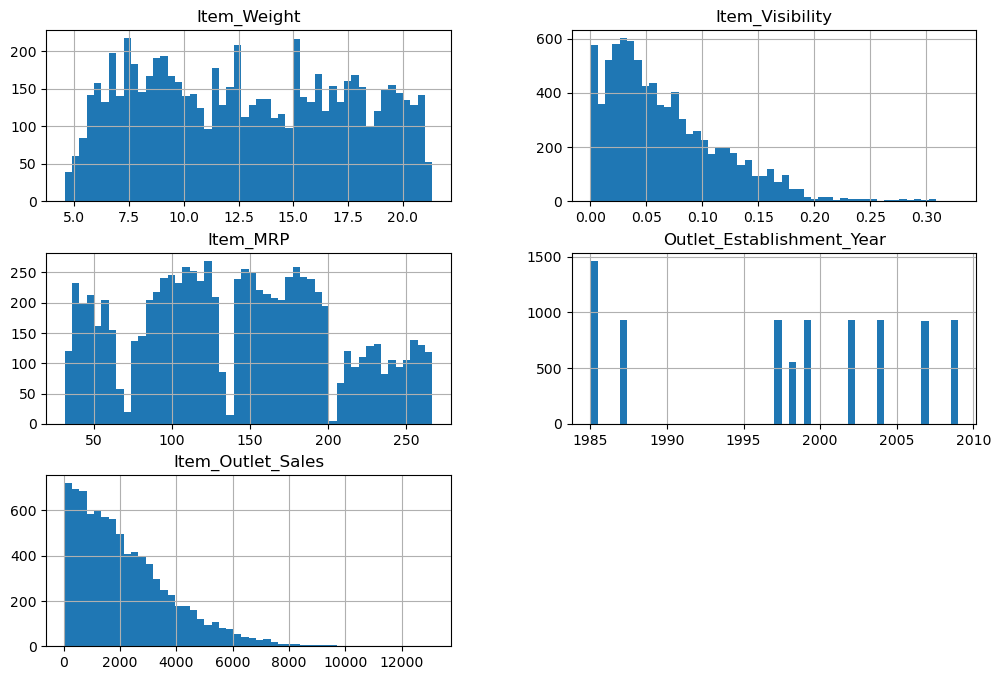

In [8]:
data.hist(bins=50,figsize=(12,8))
plt.show()

In [9]:
data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [10]:
data.select_dtypes("object")

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


### Feature engineering

In [23]:
dataProcessed = data.select_dtypes([int,float]).copy()

In [24]:
from sklearn.preprocessing import LabelEncoder

lblEnc = LabelEncoder()

In [25]:
for i in data.select_dtypes("object").columns:
    dataProcessed[i+"_enc"] = lblEnc.fit_transform(data[i]).copy()

In [26]:
dataProcessed

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_enc,Item_Fat_Content_enc,Item_Type_enc,Outlet_Identifier_enc,Outlet_Size_enc,Outlet_Location_Type_enc,Outlet_Type_enc
0,9.300,0.016047,249.8092,1999,3735.1380,156,1,4,9,1,0,1
1,5.920,0.019278,48.2692,2009,443.4228,8,2,14,3,1,2,2
2,17.500,0.016760,141.6180,1999,2097.2700,662,1,10,9,1,0,1
3,19.200,0.000000,182.0950,1998,732.3800,1121,2,6,0,3,2,0
4,8.930,0.000000,53.8614,1987,994.7052,1297,1,9,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,370,1,13,1,0,2,1
8519,8.380,0.046982,108.1570,2002,549.2850,897,2,0,7,3,1,1
8520,10.600,0.035186,85.1224,2004,1193.1136,1357,1,8,6,2,1,1
8521,7.210,0.145221,103.1332,2009,1845.5976,681,2,13,3,1,2,2


In [27]:
dataProcessed['Outlet_Identifier_enc'].nunique()

10

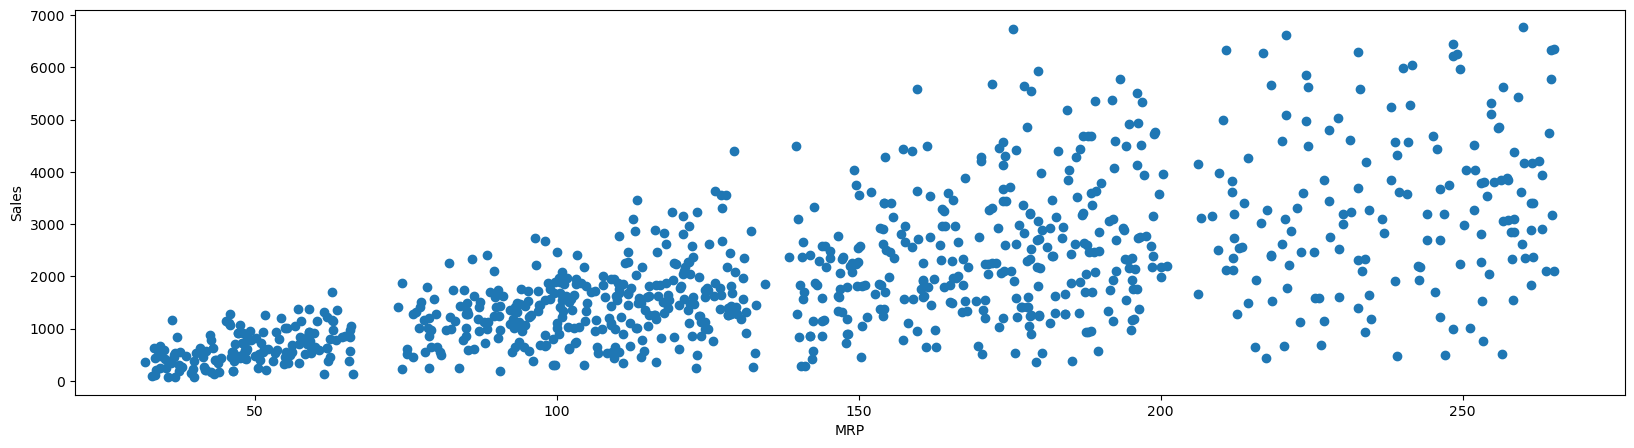

In [28]:
plt.figure(figsize=(20,5))
plt.xlabel('MRP')
plt.ylabel('Sales')
plt.scatter(dataProcessed['Item_MRP'].loc[dataProcessed['Outlet_Identifier_enc']==3],dataProcessed['Item_Outlet_Sales'].loc[dataProcessed['Outlet_Identifier_enc']==3])
plt.show()

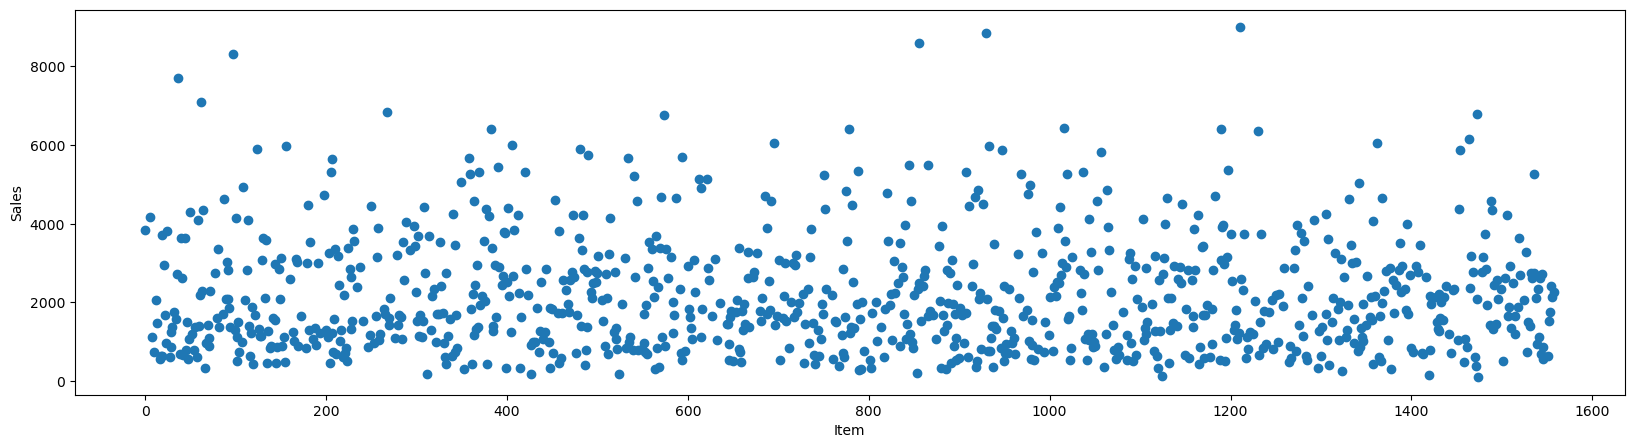

In [29]:
plt.figure(figsize=(20,5))
plt.xlabel('Item')
plt.ylabel('Sales')
plt.scatter(dataProcessed['Item_Identifier_enc'].loc[dataProcessed['Outlet_Identifier_enc']==7],dataProcessed['Item_Outlet_Sales'].loc[dataProcessed['Outlet_Identifier_enc']==7])
plt.show()

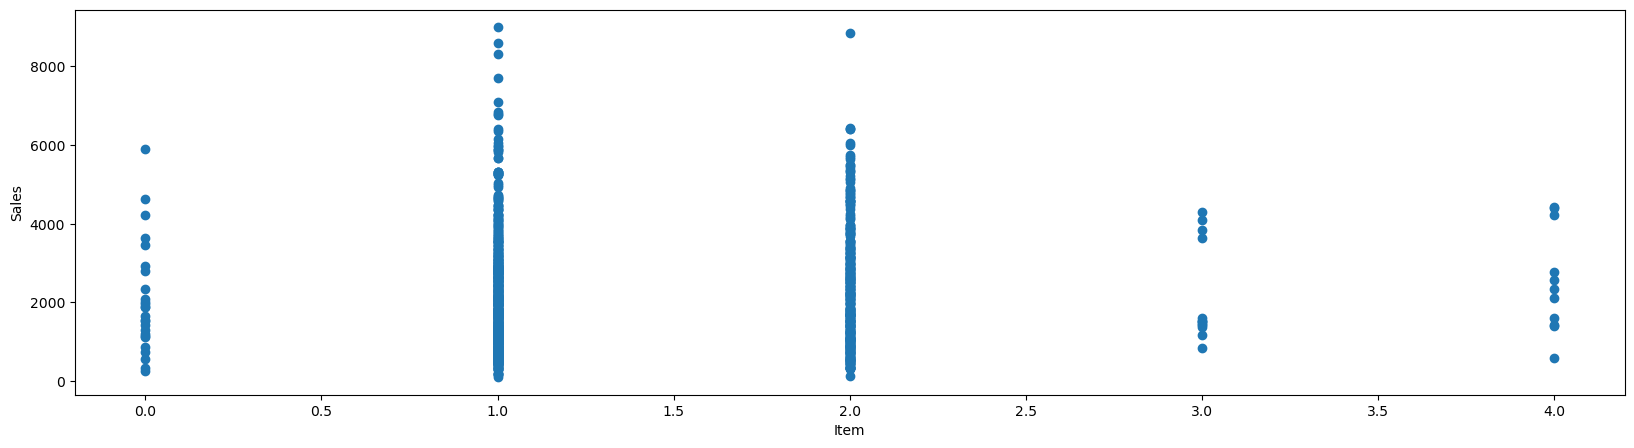

In [30]:
plt.figure(figsize=(20,5))
plt.xlabel('Item')
plt.ylabel('Sales')
plt.scatter(dataProcessed['Item_Fat_Content_enc'].loc[dataProcessed['Outlet_Identifier_enc']==7],dataProcessed['Item_Outlet_Sales'].loc[dataProcessed['Outlet_Identifier_enc']==7])
plt.show()

<AxesSubplot:>

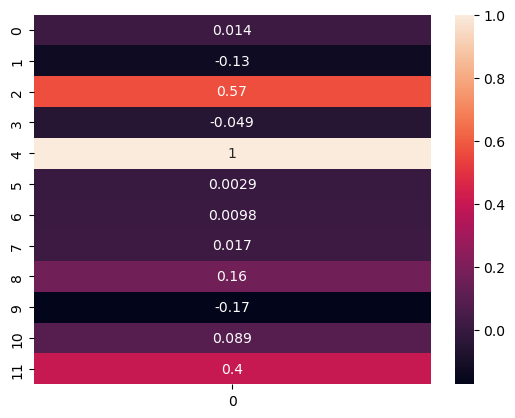

In [31]:
sns.heatmap((dataProcessed.corrwith(dataProcessed['Item_Outlet_Sales']).values.reshape(12,1)),annot=True)

In [32]:
dataProcessed.corrwith(dataProcessed['Item_Outlet_Sales'])

Item_Weight                  0.014123
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Item_Identifier_enc          0.002869
Item_Fat_Content_enc         0.009800
Item_Type_enc                0.017048
Outlet_Identifier_enc        0.162325
Outlet_Size_enc             -0.172477
Outlet_Location_Type_enc     0.089367
Outlet_Type_enc              0.401522
dtype: float64

#### Dropping 'Item_Weight', 'Item_visibility', 'Outlet_Establishment_Year' as they've less correlation with Item_Sales

In [33]:
dataProcessed.drop(['Item_Weight','Item_Visibility','Outlet_Establishment_Year'],axis=1,inplace=True)

In [34]:
dataProcessed['Item_Outlet_Sales'] = np.log(dataProcessed['Item_Outlet_Sales'])

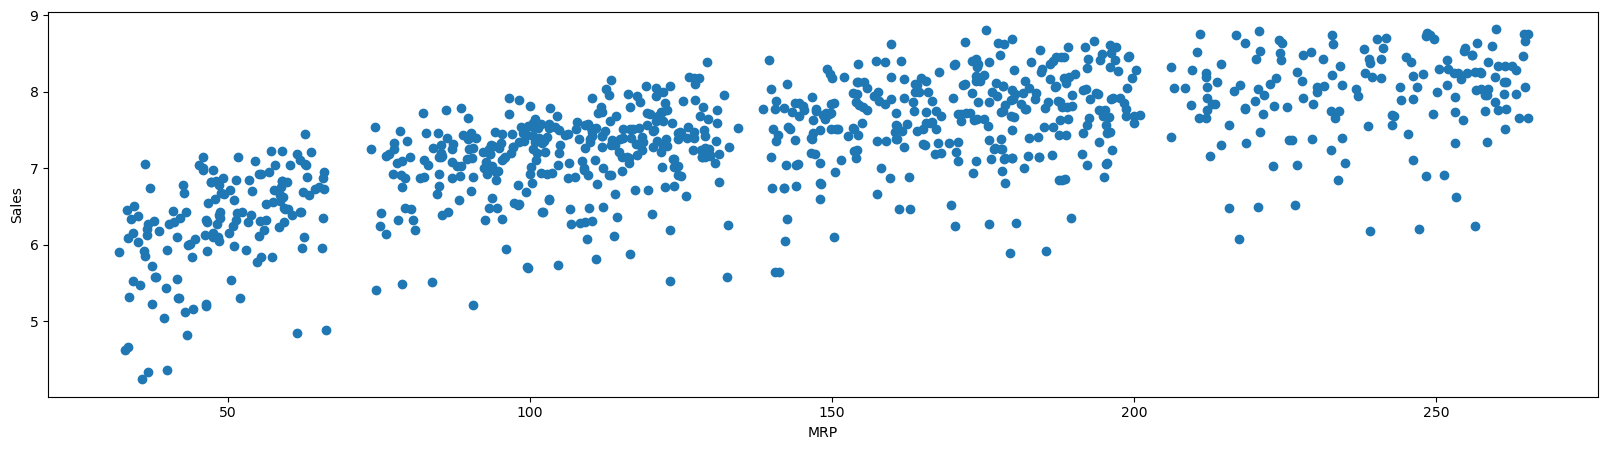

In [35]:
plt.figure(figsize=(20,5))
plt.xlabel('MRP')
plt.ylabel('Sales')
plt.scatter(dataProcessed['Item_MRP'].loc[dataProcessed['Outlet_Identifier_enc']==3],dataProcessed['Item_Outlet_Sales'].loc[dataProcessed['Outlet_Identifier_enc']==3])
plt.show()

#### Scalling Features with min_max_scaler except Label encoded values and target with Standard_Scaler to scale down the value 

In [38]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

stdSclr = StandardScaler()
minMaxSclr = MinMaxScaler()

X = dataProcessed[['Item_MRP','Item_Identifier_enc','Item_Fat_Content_enc', 'Item_Type_enc','Outlet_Size_enc', 'Outlet_Location_Type_enc', 'Outlet_Type_enc']].copy()
y = dataProcessed[['Item_Outlet_Sales']].copy()


X = pd.DataFrame(columns=['Item_MRP','Item_Identifier_enc','Item_Fat_Content_enc', 'Item_Type_enc','Outlet_Size_enc', 'Outlet_Location_Type_enc', 'Outlet_Type_enc'],data=minMaxSclr.fit_transform(X))
X['Outlet_Identifier_enc'] = dataProcessed['Outlet_Identifier_enc']
y = pd.DataFrame(columns=['Item_Outlet_Sales'],data=stdSclr.fit_transform(y))
y['Outlet_Identifier_enc'] = dataProcessed['Outlet_Identifier_enc']



In [39]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

X_train.shape,y_train.shape

((5966, 8), (5966, 2))

### 1st attempt trying with simple degree 1 LinearRegression

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

max = X_train['Outlet_Identifier_enc'].nunique()
linReg = []
for i in range(max):
    lin = LinearRegression()
    linReg.append(lin)


for i in range(max):
    linReg[i].fit(X_train[X_train['Outlet_Identifier_enc']==i],y_train['Item_Outlet_Sales'].loc[y_train['Outlet_Identifier_enc']==i])

In [43]:
y_preds = []
for i in range(max):
    preds = linReg[i].predict(X_test[X_test['Outlet_Identifier_enc']==i])
    y_preds.append(preds)

In [44]:
from sklearn.metrics import r2_score
precision = []
for i in range(max):
    model_precision = r2_score(y_test['Item_Outlet_Sales'].loc[y_test['Outlet_Identifier_enc']==i],y_preds[i])
    precision.append(model_precision)

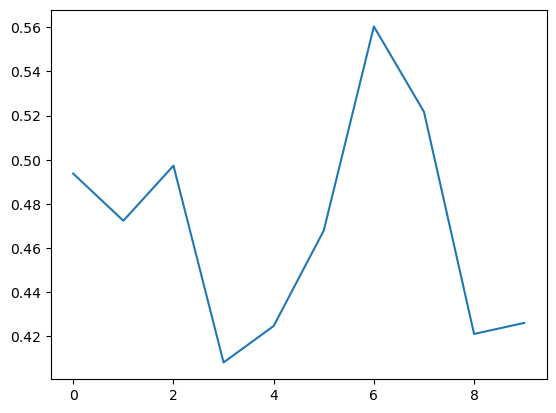

In [45]:
plt.plot(precision)

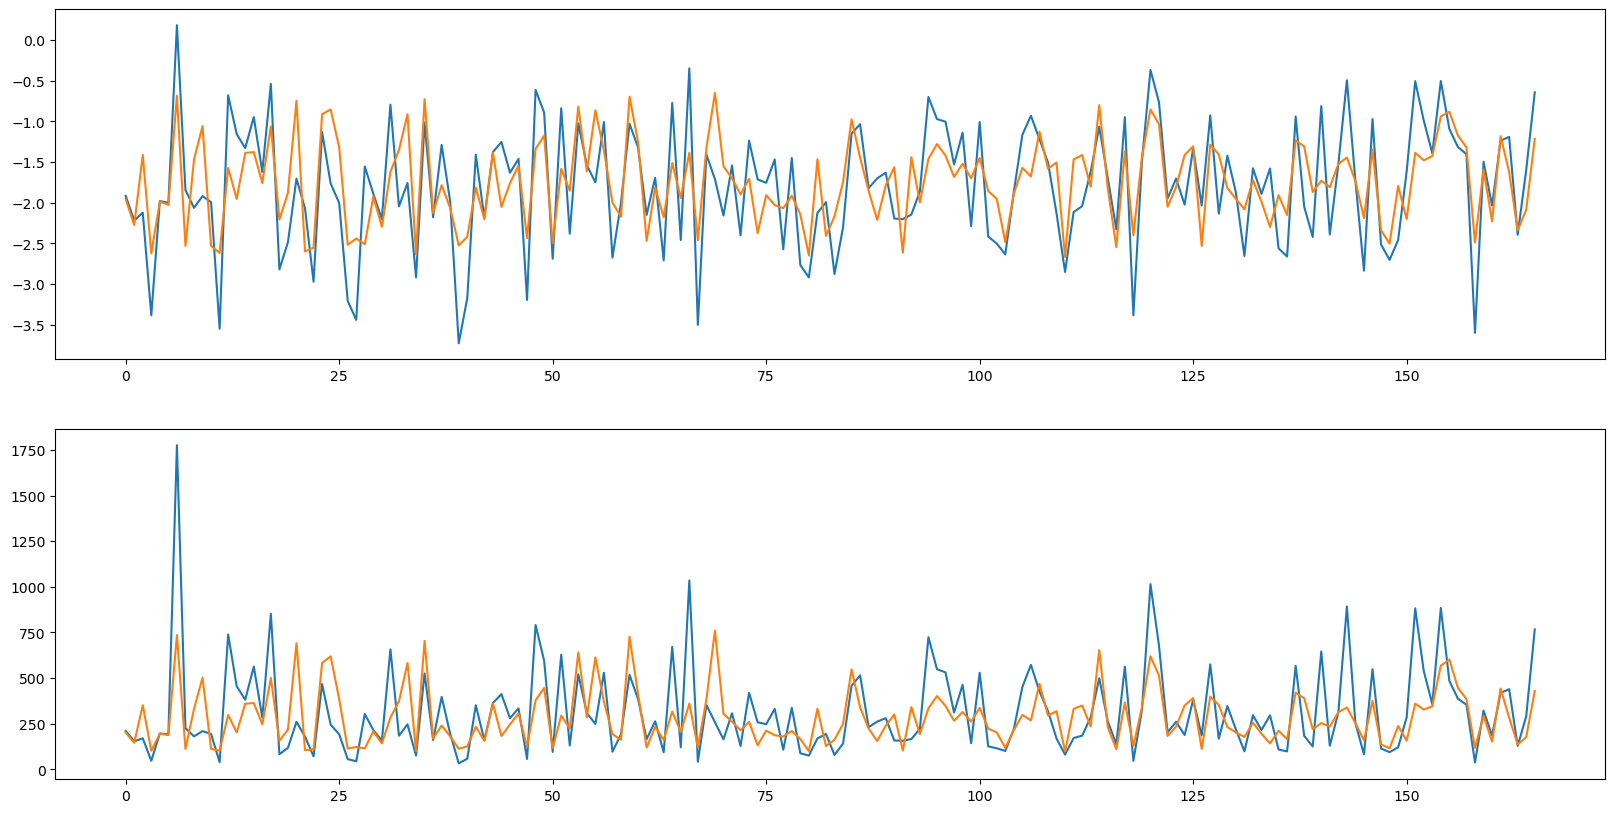

In [46]:
figure,axis = plt.subplots(2,1,figsize=(20,10))
axis[0].plot(y_test['Item_Outlet_Sales'].loc[y_test['Outlet_Identifier_enc']==0].reset_index(drop=True))
axis[0].plot(y_preds[0])


axis[1].plot(data['Item_Outlet_Sales'].iloc[y_test[(y_test['Outlet_Identifier_enc']==0)].index].reset_index(drop=True))
axis[1].plot(np.exp(stdSclr.inverse_transform(y_preds[0].reshape(-1,1))))
plt.show()

### Training on polynomial kernel

In [47]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2,include_bias=False)

max = X_train['Outlet_Identifier_enc'].unique().max()
lin_Reg_Poly = []
for i in range(max):
    reg = LinearRegression()
    lin_Reg_Poly.append(reg)


In [48]:
for i in range(max):
    lin_Reg_Poly[i].fit(poly_features.fit_transform(X_train[X_train['Outlet_Identifier_enc']==i]),y_train['Item_Outlet_Sales'].loc[y_train['Outlet_Identifier_enc']==i])

In [49]:
lin_Reg_Poly[0].coef_

array([ 1.12978280e+00, -2.13841883e+14,  6.25259822e+13, -1.61174695e+13,
        1.60040343e+13, -5.16850892e+12,  3.68119328e+13,  1.90893222e+13,
       -1.45312500e+00, -3.43750000e-01, -1.79687500e-01, -6.25000000e-02,
       -4.17476516e+12,  4.17476516e+12, -4.03150164e+12, -2.08984810e+12,
        1.28288269e-01, -1.09814453e+00, -6.66015625e-01,  2.03305004e+14,
        1.05368788e+13,  0.00000000e+00,  0.00000000e+00,  9.76562500e-04,
        1.69677734e-02, -2.47058738e+13, -3.78201083e+13,  0.00000000e+00,
        0.00000000e+00, -8.78906250e-02,  7.78301902e+12,  8.33445051e+12,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [50]:
y_preds_poly = []
max = X_train['Outlet_Identifier_enc'].unique().max()
for i in range(max):
    preds = lin_Reg_Poly[i].predict(poly_features.fit_transform(X_test[X_test['Outlet_Identifier_enc']==i]))
    y_preds_poly.append(preds)

In [51]:
from sklearn.metrics import r2_score
precision_poly = []
for i in range(max):
    model_precision = r2_score(y_test['Item_Outlet_Sales'].loc[y_test['Outlet_Identifier_enc']==i],y_preds_poly[i])
    precision_poly.append(model_precision)

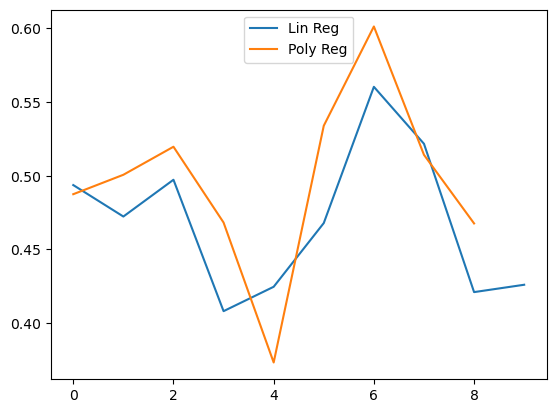

In [52]:
plt.plot(precision,label='Lin Reg')
plt.plot(precision_poly,label = 'Poly Reg')
plt.legend(loc='upper center')
plt.show()

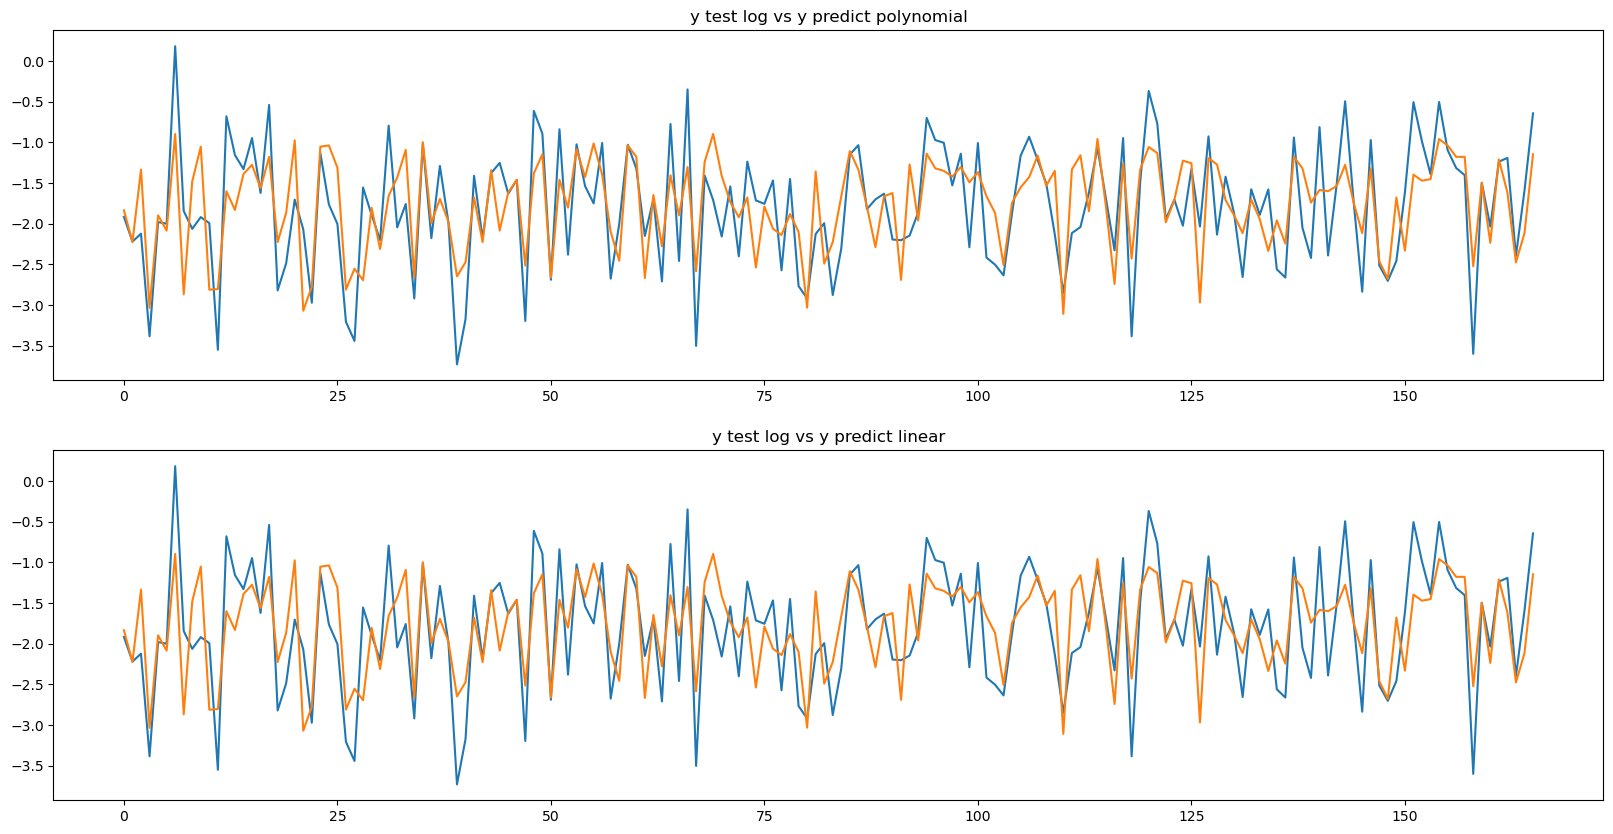

In [53]:
figures, axis = plt.subplots(2,1,figsize=(20,10))

# axis[0].figure(figsize=(20,5))
axis[0].plot(y_test['Item_Outlet_Sales'].loc[y_test['Outlet_Identifier_enc']==0].reset_index(drop=True))
axis[0].plot(y_preds_poly[0])
axis[0].set_title("y test log vs y predict polynomial")
# axis[1].figure(figsize=(20,5))
axis[1].plot(y_test['Item_Outlet_Sales'].loc[y_test['Outlet_Identifier_enc']==0].reset_index(drop=True))
axis[1].plot(y_preds_poly[0])
axis[1].set_title("y test log vs y predict linear")
plt.show()

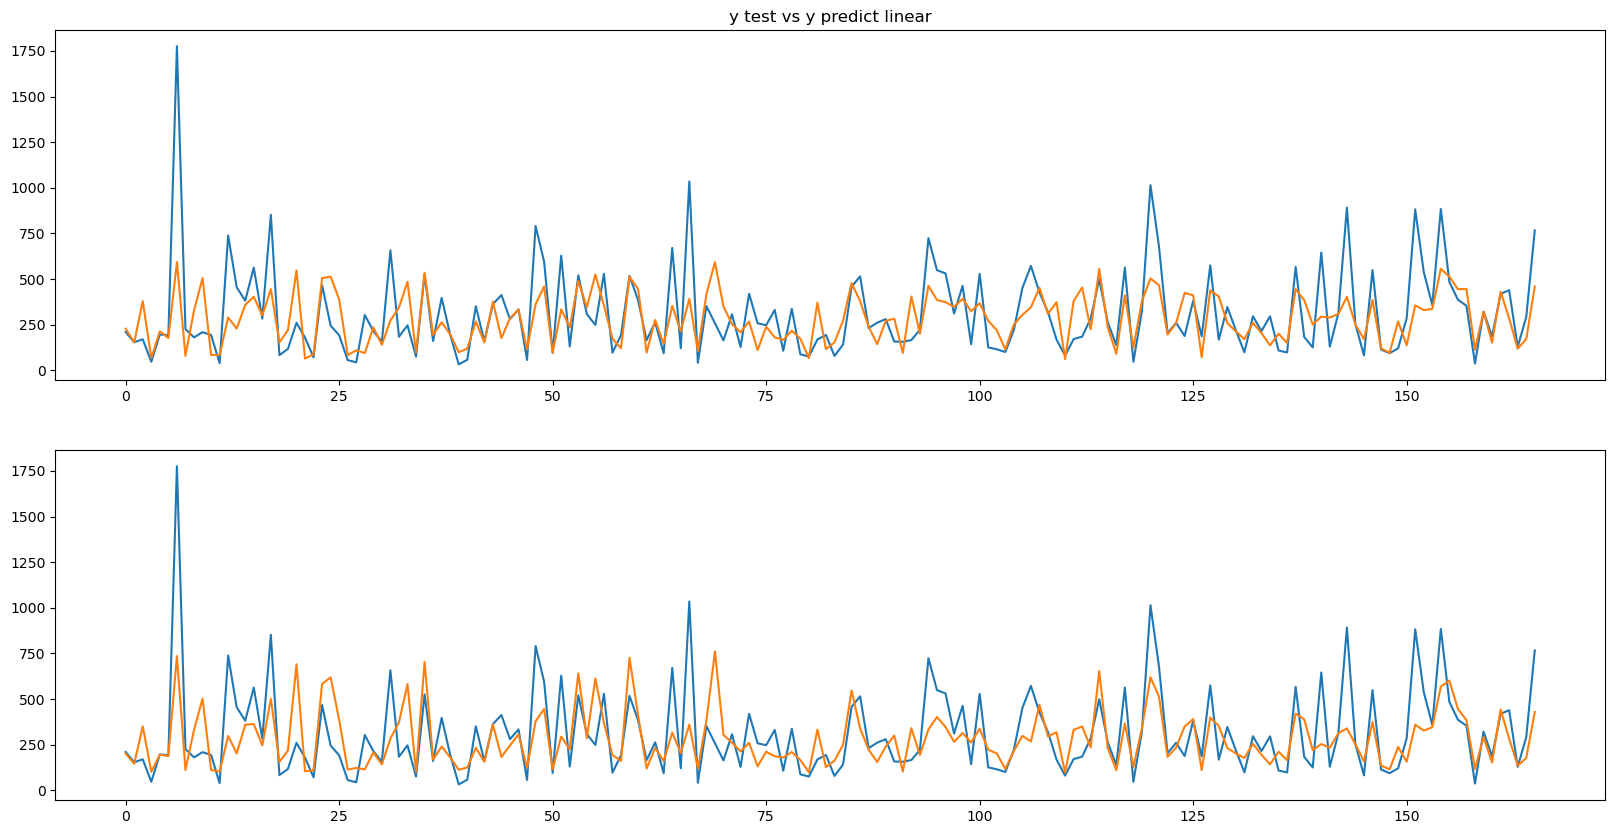

In [54]:
figure, axis = plt.subplots(2,1,figsize=(20,10))

axis[0].plot(data['Item_Outlet_Sales'].iloc[y_test[(y_test['Outlet_Identifier_enc']==0)].index].reset_index(drop=True))
axis[0].plot(np.exp(stdSclr.inverse_transform(y_preds_poly[0].reshape(-1,1))))
axis[0].set_title("y test vs y predict polynomial")

axis[1].plot(data['Item_Outlet_Sales'].iloc[y_test[(y_test['Outlet_Identifier_enc']==0)].index].reset_index(drop=True))
axis[1].plot(np.exp(stdSclr.inverse_transform(y_preds[0].reshape(-1,1))))
axis[0].set_title("y test vs y predict linear")
plt.show()